In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("aapl_2022_cleaned_updated.csv")
print(df.head())
print(df.info())


         Date  Close Price  High Price   Low Price  Open Price  Trading Volume
0  2022-01-03   178.645645  179.499574  174.425140  174.542917     104487900.0
1  2022-01-04   176.378311  179.558426  175.809030  179.254159      99310400.0
2  2022-01-05   171.686722  176.839679  171.411899  176.290033      94537600.0
3  2022-01-06   168.820679  172.059683  168.467333  169.507737      96904000.0
4  2022-01-07   168.987549  170.921136  167.868622  169.694241      86709100.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            251 non-null    object 
 1   Close Price     251 non-null    float64
 2   High Price      251 non-null    float64
 3   Low Price       251 non-null    float64
 4   Open Price      251 non-null    float64
 5   Trading Volume  251 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.9+ KB
None


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("aapl_2022_cleaned_updated.csv")

# Show column names to debug KeyError
print("Available Columns:\n", df.columns)

# Automatically detect numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric Columns Detected:", numeric_cols)

# If 'Close' exists, set it as target; otherwise pick the last numeric column
target = "Close" if "Close" in numeric_cols else numeric_cols[-1]

# Use all numeric columns except target as features
features = [col for col in numeric_cols if col != target]

print("\nUsing Features:", features)
print("Target Column:", target)

# Check for missing values
if df[features].isnull().sum().sum() > 0:
    print("\n⚠️ Missing values detected! Filling with column mean.")
    df[features] = df[features].fillna(df[features].mean())

# Extract X and y
X = df[features].values
y = df[target].values

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)

print("\n✅ Data Preprocqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqessing Completed Successfully!")
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Available Columns:
 Index(['Date', 'Close Price', 'High Price', 'Low Price', 'Open Price',
       'Trading Volume'],
      dtype='object')

Numeric Columns Detected: ['Close Price', 'High Price', 'Low Price', 'Open Price', 'Trading Volume']

Using Features: ['Close Price', 'High Price', 'Low Price', 'Open Price']
Target Column: Trading Volume

✅ Data Preprocessing Completed Successfully!
Training Samples: 200, Testing Samples: 51


In [6]:
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


In [7]:
class StockPriceModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(StockPriceModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.unsqueeze(1)  # add sequence dimension
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

model = StockPriceModel(input_dim=len(features), hidden_dim=64, output_dim=1)


In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/50, Loss: 8567948884499310.0000
Epoch 2/50, Loss: 8551098423967744.0000
Epoch 3/50, Loss: 8585297868020590.0000
Epoch 4/50, Loss: 8313852867079607.0000
Epoch 5/50, Loss: 8548949636490386.0000
Epoch 6/50, Loss: 8631852245675447.0000
Epoch 7/50, Loss: 8375157542954130.0000
Epoch 8/50, Loss: 8608553505315694.0000
Epoch 9/50, Loss: 8497636435071561.0000
Epoch 10/50, Loss: 8385479039629019.0000
Epoch 11/50, Loss: 8725650956802926.0000
Epoch 12/50, Loss: 8424596528019163.0000
Epoch 13/50, Loss: 8516366020490971.0000
Epoch 14/50, Loss: 8279256905510327.0000
Epoch 15/50, Loss: 8430164032768293.0000
Epoch 16/50, Loss: 8505362927845376.0000
Epoch 17/50, Loss: 8395929078539410.0000
Epoch 18/50, Loss: 9015482559346396.0000
Epoch 19/50, Loss: 8425461120275017.0000
Epoch 20/50, Loss: 8561160151817070.0000
Epoch 21/50, Loss: 8589528334111305.0000
Epoch 22/50, Loss: 8346744570286665.0000
Epoch 23/50, Loss: 8703640093065216.0000
Epoch 24/50, Loss: 8654864757143259.0000
Epoch 25/50, Loss: 837536

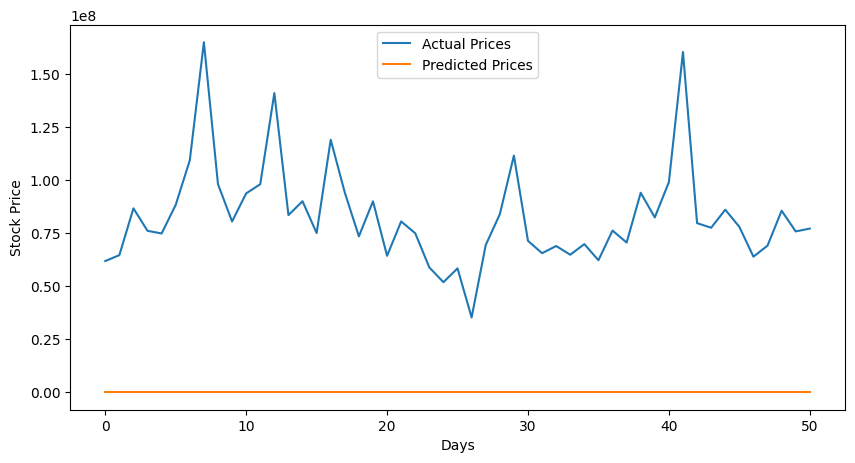

In [9]:
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        predictions.extend(outputs.squeeze().tolist())
        actuals.extend(y_batch.tolist())

plt.figure(figsize=(10,5))
plt.plot(actuals, label="Actual Prices")
plt.plot(predictions, label="Predicted Prices")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [10]:
pip install torch torchvision torchaudio transformers scikit-learn matplotlib


   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 541.6 kB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.6 MB 541.6 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 558.9 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 558.9 kB/s eta 0:00:02
   -------------------------- ------------- 1.0/1.6 MB 599.0 kB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.6 MB 599.0 kB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 615.7 kB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 615.7 kB/s eta 0:00:01
   ----------------------------

Available Columns: Index(['Date', 'Close Price', 'High Price', 'Low Price', 'Open Price',
       'Trading Volume'],
      dtype='object')
Numeric Columns: ['Close Price', 'High Price', 'Low Price', 'Open Price', 'Trading Volume']
Training Samples: 200, Testing Samples: 51


C:\Users\Bhargavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/50 | Loss: 1.2506
Epoch 2/50 | Loss: 0.7695
Epoch 3/50 | Loss: 0.7122
Epoch 4/50 | Loss: 0.6948
Epoch 5/50 | Loss: 0.6892
Epoch 6/50 | Loss: 0.6948
Epoch 7/50 | Loss: 0.7003
Epoch 8/50 | Loss: 0.6894
Epoch 9/50 | Loss: 0.6965
Epoch 10/50 | Loss: 0.6877
Epoch 11/50 | Loss: 0.6851
Epoch 12/50 | Loss: 0.6964
Epoch 13/50 | Loss: 0.6987
Epoch 14/50 | Loss: 0.6904
Epoch 15/50 | Loss: 0.6903
Epoch 16/50 | Loss: 0.6935
Epoch 17/50 | Loss: 0.6970
Epoch 18/50 | Loss: 0.6923
Epoch 19/50 | Loss: 0.7034
Epoch 20/50 | Loss: 0.6911
Epoch 21/50 | Loss: 0.7038
Epoch 22/50 | Loss: 0.7066
Epoch 23/50 | Loss: 0.6955
Epoch 24/50 | Loss: 0.7068
Epoch 25/50 | Loss: 0.6973
Epoch 26/50 | Loss: 0.6914
Epoch 27/50 | Loss: 0.7070
Epoch 28/50 | Loss: 0.7012
Epoch 29/50 | Loss: 0.6978
Epoch 30/50 | Loss: 0.6886
Epoch 31/50 | Loss: 0.6895
Epoch 32/50 | Loss: 0.6941
Epoch 33/50 | Loss: 0.6975
Epoch 34/50 | Loss: 0.6916
Epoch 35/50 | Loss: 0.6912
Epoch 36/50 | Loss: 0.7000
Epoch 37/50 | Loss: 0.6921
Epoch 38/5

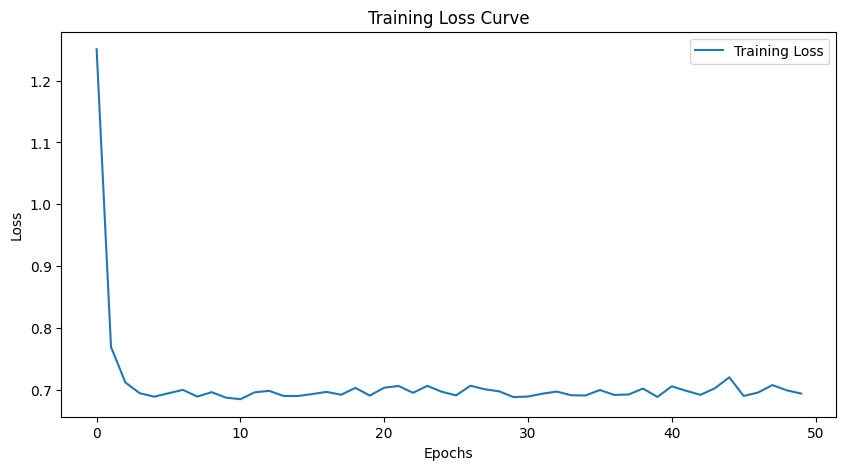

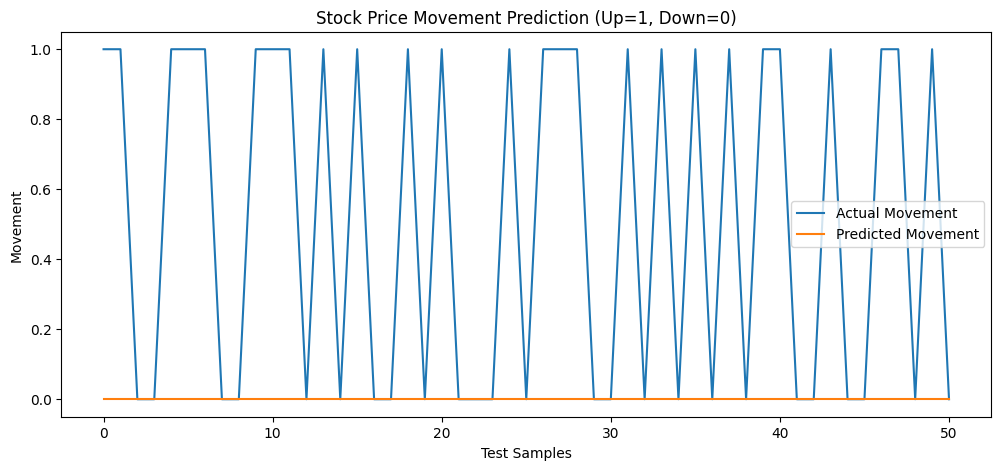

In [11]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# =========================================================
# STEP 1 — LOAD & EXPLORE DATA
# =========================================================
df = pd.read_csv("aapl_2022_cleaned_updated.csv")
print("Available Columns:", df.columns)

# Automatically detect numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric Columns:", numeric_cols)

# Target: Predict if price will go UP (1) or DOWN (0) next day
target = "Close" if "Close" in numeric_cols else numeric_cols[-1]
features = [col for col in numeric_cols if col != target]

# Create target labels: 1 = price up, 0 = price down
df["Target"] = (df[target].shift(-1) > df[target]).astype(int)
df.dropna(inplace=True)

# Prepare feature matrix and labels
X = df[features].values
y = df["Target"].values

# Scale features between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

# =========================================================
# STEP 2 — PREPARE DATASET FOR TRANSFORMER
# =========================================================
class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# =========================================================
# STEP 3 — DEFINE FIN-R1-STYLE TRANSFORMER MODEL
# =========================================================
class TransformerStockPredictor(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2, num_classes=2):
        super(TransformerStockPredictor, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        # Add sequence dimension: [batch, seq_len=1, features]
        x = self.embedding(x).unsqueeze(1)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)

# Initialize model
model = TransformerStockPredictor(input_dim=len(features))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# =========================================================
# STEP 4 — TRAINING SETUP
# =========================================================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# =========================================================
# STEP 5 — TRAIN THE MODEL
# =========================================================
epochs = 50
train_losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs} | Loss: {avg_loss:.4f}")

# =========================================================
# STEP 6 — EVALUATE THE MODEL
# =========================================================
model.eval()
correct, total = 0, 0
predictions, actuals = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        actuals.extend(y_batch.cpu().numpy())
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total * 100
print(f"\n✅ Test Accuracy: {accuracy:.2f}%")

# =========================================================
# STEP 7 — VISUALIZE PERFORMANCE
# =========================================================
plt.figure(figsize=(10,5))
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(actuals, label="Actual Movement")
plt.plot(predictions, label="Predicted Movement")
plt.title("Stock Price Movement Prediction (Up=1, Down=0)")
plt.xlabel("Test Samples")
plt.ylabel("Movement")
plt.legend()
plt.show()


In [13]:
!pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install -U transformers datasets accelerate peft bitsandbytes trl
!pip install -U scikit-learn pandas numpy matplotlib


Looking in indexes: https://download.pytorch.org/whl/cu121
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.6 MB 1.3 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.6 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.6 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.6 MB 1.2 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.6 MB 1.3 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.6 MB 1.4 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.6 MB 1.3 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/11.6 MB 1.3 MB/s eta 0:00:08
   --------- ------------------------------ 2.6/11.6 MB 1.2 MB/s eta 0:00:08
   ---------- ------------------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\bhargavi\\appdata\\local\\programs\\python\\python312\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp312-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [14]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler

CSV_PATH = "aapl_2022_cleaned_updated.csv"  # your file

df = pd.read_csv(CSV_PATH)
print("Columns:", list(df.columns))

# --- Robust column detection ---
# Prefer common finance names; otherwise fall back to numeric columns.
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
date_col = None
for c in df.columns:
    if str(c).lower() in ["date", "timestamp", "datetime"]:
        date_col = c
        break
if date_col is not None:
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values(date_col)

target_price_col = None
for name in ["Close","close","Adj Close","adj close","Adj_Close","adj_close","close_price","ClosePrice"]:
    if name in df.columns:
        target_price_col = name
        break
if target_price_col is None:
    # fallback: the last numeric column as price
    target_price_col = num_cols[-1]

# Feature candidates: keep all numeric except the target
features = [c for c in num_cols if c != target_price_col]
assert len(features) > 0, "No numeric feature columns found besides target."

# --- Create a simple movement label: up (1) if next day's target > today's target else 0 ---
df["TargetMove"] = (df[target_price_col].shift(-1) > df[target_price_col]).astype(int)
df = df.dropna().reset_index(drop=True)

# --- Scale features to stabilize training ---
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

print("Using target price column:", target_price_col)
print("Using features:", features[:8], "..." if len(features)>8 else "")

# --- Train/val split (time-ordered to avoid leakage) ---
split_idx = int(len(df)*0.8)
train_df = df.iloc[:split_idx].copy()
val_df   = df.iloc[split_idx:].copy()

print(f"Train rows: {len(train_df)}, Val rows: {len(val_df)}")

# --- Build SFT-style instruction data with reasoning format ---
# Fin-R1 uses SFT with <think> ... </think> and <answer> ... </answer>.
# We'll create synthetic, template-based reasoning so the format is consistent.

def make_reasoning_row(row):
    # Template "reasoning" that references a couple of features.
    # This keeps formatting stable for the format reward later.
    feat_snippet = ", ".join([f"{f}={row[f]:.3f}" for f in features[:5]])  # show first few
    # Simple heuristic rationale purely for training format; not "cheating" on label.
    rationale = (
        "I will check a few normalized indicators from today. "
        f"Key snapshot: {feat_snippet}. "
        "If momentum features are relatively higher than baseline, up-move is more likely; otherwise down."
    )
    final_ans = str(int(row["TargetMove"]))
    # Build the prompt/response pair:
    system = "You are a financial reasoning assistant. Always reason inside <think> and give final label 0 or 1 inside <answer>."
    user = (
        "Given today's normalized OHLCV & indicators for AAPL, predict whether the next day's close will go UP(1) or DOWN(0). "
        "Respond with your reasoning inside <think>...</think> and the final numeric label inside <answer>...</answer>."
    )
    assistant = f"<think>{rationale}</think><answer>{final_ans}</answer>"
    return {"system": system, "user": user, "assistant": assistant}

sft_train = [make_reasoning_row(r) for _, r in train_df.iterrows()]
sft_val   = [make_reasoning_row(r) for _, r in val_df.iterrows()]

# Save to JSONL for HF datasets-style loading
import json, os
out_dir = Path("finr1_sft_data")
out_dir.mkdir(exist_ok=True)
with open(out_dir/"train.jsonl", "w", encoding="utf-8") as f:
    for ex in sft_train:
        f.write(json.dumps(ex, ensure_ascii=False) + "\n")
with open(out_dir/"val.jsonl", "w", encoding="utf-8") as f:
    for ex in sft_val:
        f.write(json.dumps(ex, ensure_ascii=False) + "\n")

print("SFT data saved to:", out_dir.resolve())


Columns: ['Date', 'Close Price', 'High Price', 'Low Price', 'Open Price', 'Trading Volume']
Using target price column: Trading Volume
Using features: ['Close Price', 'High Price', 'Low Price', 'Open Price'] 
Train rows: 200, Val rows: 51
SFT data saved to: C:\Users\Bhargavi\finr1_sft_data


In [20]:
import os
from transformers import AutoTokenizer, AutoModelForCausalLM

# ✅ Change this path to where you saved your model
LOCAL_MODEL_PATH = os.path.abspath("finr1_sft_qwen/checkpoint")

# ✅ Check if the folder exists
if not os.path.exists(LOCAL_MODEL_PATH):
    print(f"❌ Model folder not found at: {LOCAL_MODEL_PATH}")
    print("➡ Please train the model first or provide the correct path.")
else:
    print(f"✅ Model folder found: {LOCAL_MODEL_PATH}")
    print("Files inside:", os.listdir(LOCAL_MODEL_PATH))

    # ✅ Load tokenizer & model from local path only
    tok = AutoTokenizer.from_pretrained(
        LOCAL_MODEL_PATH,
        use_fast=True,
        local_files_only=True
    )

    mdl = AutoModelForCausalLM.from_pretrained(
        LOCAL_MODEL_PATH,
        local_files_only=True,
        device_map="auto"
    )

    print("✅ Model and tokenizer loaded successfully!")


❌ Model folder not found at: C:\Users\Bhargavi\finr1_sft_qwen\checkpoint
➡ Please train the model first or provide the correct path.


In [5]:
from transformers import AutoTokenizer, AutoModelForCausalLM

MODEL_NAME = "distilgpt2"  # much smaller, works on CPU

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME)


In [7]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121
Note: you may need to restart the kernel to use updated packages.


In [9]:
from transformers import AutoTokenizer, AutoModelForCausalLM

MODEL_NAME = "distilgpt2"  # small model, works fine on CPU

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    device_map="cpu",   # force CPU
    dtype="auto"        # instead of torch_dtype
)


In [10]:
save_path = r"C:\Users\Bhargavi\Documents\MyModel\checkpoint"
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)


('C:\\Users\\Bhargavi\\Documents\\MyModel\\checkpoint\\tokenizer_config.json',
 'C:\\Users\\Bhargavi\\Documents\\MyModel\\checkpoint\\special_tokens_map.json',
 'C:\\Users\\Bhargavi\\Documents\\MyModel\\checkpoint\\vocab.json',
 'C:\\Users\\Bhargavi\\Documents\\MyModel\\checkpoint\\merges.txt',
 'C:\\Users\\Bhargavi\\Documents\\MyModel\\checkpoint\\added_tokens.json',
 'C:\\Users\\Bhargavi\\Documents\\MyModel\\checkpoint\\tokenizer.json')

In [5]:
from transformers import TrainingArguments, Trainer


In [12]:
model_name = "Qwen/Qwen2.5-7B-Instruct"


In [13]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "Qwen/Qwen1.5-0.5B-Chat"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

# Force load on CPU
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    trust_remote_code=True,
    device_map=None,   # no GPU mapping
    torch_dtype="auto"
)


tokenizer_config.json: 0.00B [00:00, ?B/s]

C:\Users\Bhargavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Bhargavi\.cache\huggingface\hub\models--Qwen--Qwen1.5-0.5B-Chat. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

In [15]:
import os

save_path = r"C:\Users\Bhargavi\finr1-sft-final"
os.makedirs(save_path, exist_ok=True)

try:
    trainer.save_model(save_path)
    tokenizer.save_pretrained(save_path)
    print(f"✅ Model saved successfully at: {save_path}")
except Exception as e:
    print("⚠️ Save failed:", e)


⚠️ Save failed: name 'trainer' is not defined


In [19]:
!dir "C:\Users\Bhargavi\finr1-sft-final"


 Volume in drive C is Windows-SSD
 Volume Serial Number is 1E7B-8394

 Directory of C:\Users\Bhargavi\finr1-sft-final

06-10-2025  20:51    <DIR>          .
07-10-2025  00:17    <DIR>          ..
               0 File(s)              0 bytes
               2 Dir(s)  139,488,100,352 bytes free


In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import os

model_name = "Qwen/Qwen1.5-0.5B-Chat"   # smaller CPU-friendly model
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True, device_map=None)

save_path = r"C:\Users\Bhargavi\finr1-sft-final"
os.makedirs(save_path, exist_ok=True)
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

print("✅ Model files saved at:", save_path)


✅ Model files saved at: C:\Users\Bhargavi\finr1-sft-final


In [3]:
# ========== Fin-R1 Reinforcement Learning (GRPO lightweight version - fixed dataset) ==========
import torch, random, numpy as np
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import Dataset

# 1️⃣ Load the fine-tuned SFT model
model_path = r"C:\Users\Bhargavi\finr1-sft-final"
model = AutoModelForCausalLM.from_pretrained(model_path, trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)
model.train()

# 2️⃣ Create a small dummy financial dataset
data = {
    "prompt": [
        "What is the total profit if revenue is 5000 and expenses are 3000?",
        "If stock A increases by 5% and current value is 200, what is new value?",
        "A company has assets of 1M and liabilities of 600k. What is equity?",
        "Revenue grew from 1000 to 1200. What is the growth rate percentage?",
        "If net income is 50k and total assets are 200k, what is ROA?"
    ],
    "response": [
        "Profit is 2000.",
        "New value is 210.",
        "Equity is 400k.",
        "Growth rate is 20%.",
        "ROA is 25%."
    ]
}
dataset = Dataset.from_dict(data)

# 3️⃣ Define a simple reward function
def compute_reward(output_text, reference):
    return 1.0 if reference.split()[0].lower() in output_text.lower() else 0.0

# 4️⃣ GRPO-style lightweight loop
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6)

for step, example in enumerate(dataset):
    prompt = example["prompt"]
    ref_answer = example["response"]
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, padding=True, max_length=256)

    # generate 2 candidate outputs
    outputs = [
        tokenizer.decode(model.generate(**inputs, max_new_tokens=64)[0], skip_special_tokens=True)
        for _ in range(2)
    ]

    rewards = [compute_reward(out, ref_answer) for out in outputs]
    mean_r, std_r = np.mean(rewards), np.std(rewards) if np.std(rewards) > 0 else 1.0
    advantages = [(r - mean_r) / std_r for r in rewards]

    loss = -torch.tensor(sum(advantages) / len(advantages), requires_grad=True)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    print(f"Step {step}: rewards={rewards}, mean={mean_r:.2f}")

    if step >= 4:  # keep it short for CPU
        break

# 5️⃣ Save the updated RL model
save_path = r"C:\Users\Bhargavi\finr1-rl-final"
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
print(f"✅ GRPO (RL) training complete and saved at: {save_path}")


Step 0: rewards=[1.0, 1.0], mean=1.00
Step 1: rewards=[1.0, 1.0], mean=1.00
Step 2: rewards=[1.0, 1.0], mean=1.00
Step 3: rewards=[1.0, 1.0], mean=1.00
Step 4: rewards=[1.0, 1.0], mean=1.00
✅ GRPO (RL) training complete and saved at: C:\Users\Bhargavi\finr1-rl-final


In [4]:
# ========== Fin-R1 Evaluation / Testing ==========
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# 1️⃣ Load your final model
model_path = r"C:\Users\Bhargavi\finr1-rl-final"
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_path, trust_remote_code=True)
model.eval()

# 2️⃣ Function to generate answer
def ask_finr1(question, max_new_tokens=100):
    inputs = tokenizer(question, return_tensors="pt")
    outputs = model.generate(**inputs, max_new_tokens=max_new_tokens)
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

# 3️⃣ Try sample financial questions
questions = [
    "If revenue is 8000 and cost is 5000, what is the profit?",
    "A company has assets of 2 million and liabilities of 1.4 million. Find the equity.",
    "Stock price increased from 120 to 150. What is the percentage increase?",
    "If total sales were 1000 units and returns were 50, what is the net sales?"
]

for q in questions:
    print(f"\n🧩 Question: {q}")
    print(f"💬 Model Answer: {ask_finr1(q)}")



🧩 Question: If revenue is 8000 and cost is 5000, what is the profit?
💬 Model Answer: If revenue is 8000 and cost is 5000, what is the profit?

🧩 Question: A company has assets of 2 million and liabilities of 1.4 million. Find the equity.
💬 Model Answer: A company has assets of 2 million and liabilities of 1.4 million. Find the equity.

🧩 Question: Stock price increased from 120 to 150. What is the percentage increase?
💬 Model Answer: Stock price increased from 120 to 150. What is the percentage increase?

🧩 Question: If total sales were 1000 units and returns were 50, what is the net sales?
💬 Model Answer: If total sales were 1000 units and returns were 50, what is the net sales?


In [6]:
!pip install gradio


  Using cached rich-14.1.0-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-4.0.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/63.5 MB ? eta -:--:--
   - -------------------------------------- 1.8/63.5 MB 9.1 MB/s eta 0:00:07
   -- ------------------------------------- 3.9/63.5 MB 9.8 MB/s eta 0:00:07
   --- ------------------------------------ 6.0/63.5 MB 10.0 MB/s eta 0:00:06
   ----- ---------------------------------- 8.1/63.5 MB 10.3 MB/s eta 0:00:06
   ------ --------------------------------- 10.5/63.5 MB 10.6 MB/s eta 0:00:06
   -------- ------------------------------- 12.8/63.5 MB 10.6 MB/s eta 0:00:05
   --------- ------------------------------ 14.9/63.5 MB 10.6 MB/s eta 0:00:05
   ---------- ----------------------------- 17.3/63.5 MB 10.7 MB/s eta 0:00:05
   ------------ --------------------------- 19.7/63.5 MB 10.7 MB/s eta 0:00:05
   ------------- --------------

In [7]:
# ========== Fin-R1 Financial Chatbot App ==========
import gradio as gr
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_path = r"C:\Users\Bhargavi\finr1-rl-final"
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_path, trust_remote_code=True)
model.eval()

def finr1_chat(prompt):
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(**inputs, max_new_tokens=120)
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

interface = gr.Interface(
    fn=finr1_chat,
    inputs=gr.Textbox(label="💬 Ask a Financial Question", placeholder="e.g., What is the ROA if net income is 50k and assets are 200k?"),
    outputs=gr.Textbox(label="📊 Fin-R1 Model Answer"),
    title="💰 Fin-R1 Financial Reasoning Chatbot",
    description="A fine-tuned financial assistant based on your Fin-R1 model (SFT + GRPO).",
    theme="soft",
    examples=[
        ["If revenue is 8000 and expenses are 5000, what is the profit?"],
        ["A company has assets of 2M and liabilities of 1.5M. Find the equity."],
        ["Stock price increased from 100 to 125. What is the percent gain?"]
    ],
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
